<a href="https://colab.research.google.com/github/Snehaannazac/colab-git-demo-sanna/blob/main/Lesson_10_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Product: Amazon Alexa**


## **Assignment Natural Language processsing - Sentiment Analysis**

### **Customer Review Classification using Random Forest**

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- **The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.** Positive or Negative review?
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews also provided(`amazon_alexa.tsv`)
---




### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a classification model.**



**Dataset Information:**

The dataset consists of customer reviews for Amazon Alexa products, including various features related to the product variation, customer rating, and feedback sentiment.

_Features/Columns_:
* rating: The customer rating of the product (scale of 1 to 5).
* date: The date when the review was posted.
* variation: The variation or type of Alexa product the review is for (e.g., "Charcoal Fabric", "Walnut Finish").
* verified_reviews: The actual review text written by the customer.
* feedback: The target variable indicating the sentiment of the review (1 for positive sentiment and 0 for negative sentiment).



---




In [7]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file manually


Saving amazon_alexa.tsv to amazon_alexa.tsv


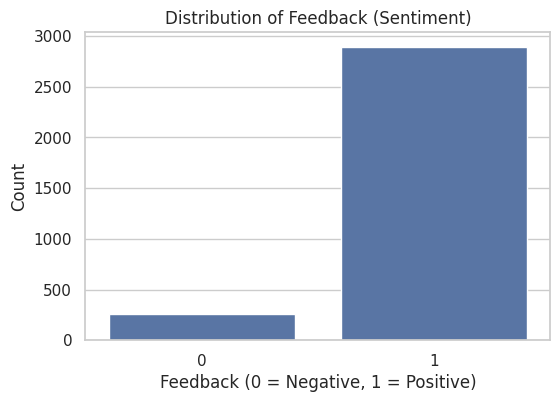

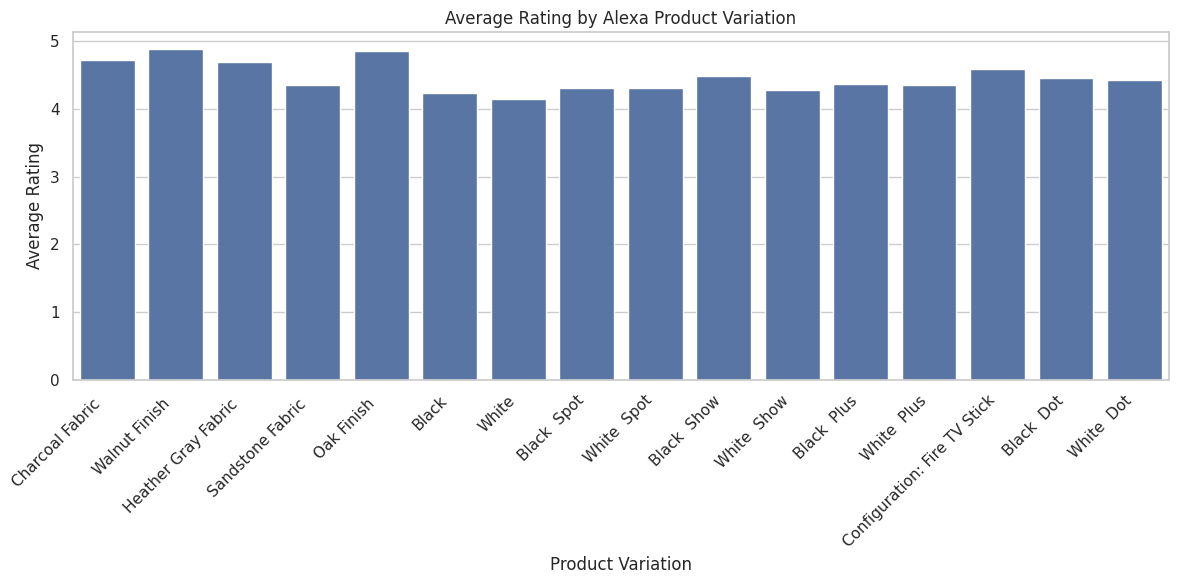

(3150, 3799) (3150,)


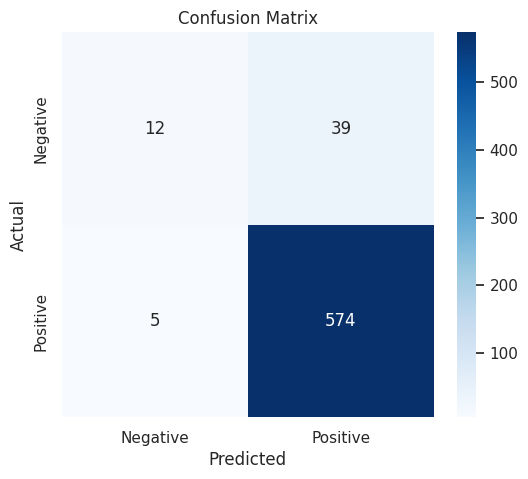

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.24      0.35        51
           1       0.94      0.99      0.96       579

    accuracy                           0.93       630
   macro avg       0.82      0.61      0.66       630
weighted avg       0.92      0.93      0.91       630



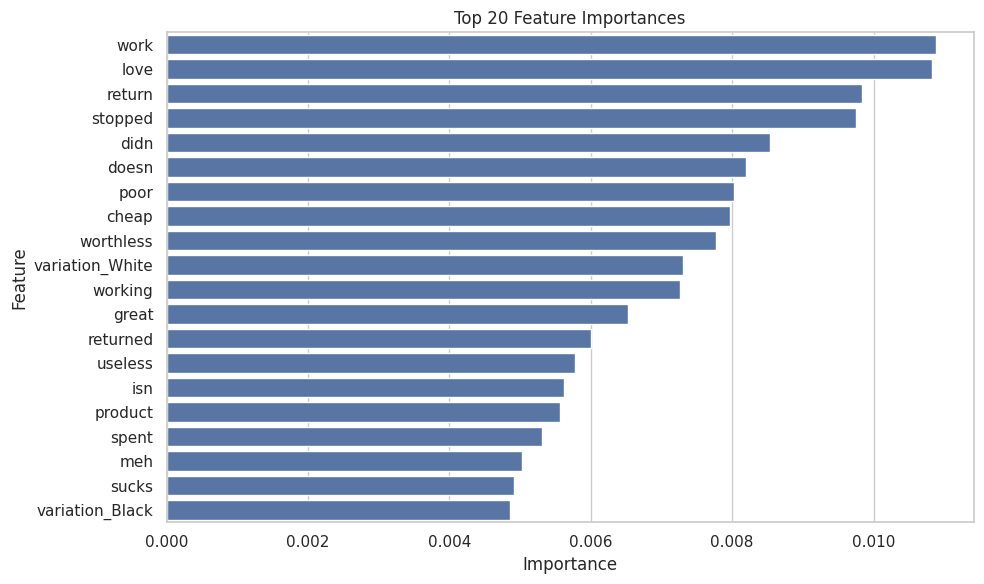

Positive


In [32]:
# Amazon Alexa Customer Review Sentiment Analysis
# Objective: Classify reviews as positive or negative using Random Forest




# TODO: Import necessary libraries
# Hint: You'll need pandas, numpy, matplotlib, seaborn, and various sklearn modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# TODO: Load the dataset
# Hint: Use pandas to read the CSV file from your Google Drive
# file_path = 'C:/Users/megha/amazon_alexa.tsv'
# Load the TSV file using pandas (tab separated)
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

# Check first few rows
df.head()
# Data Visualization and Clean Up
# TODO: Visualize the distribution of feedback
# Hint: Use seaborn's countplot function
plt.figure(figsize=(6,4))
sns.countplot(x='feedback', data=df)
plt.title('Distribution of Feedback (Sentiment)')
plt.xlabel('Feedback (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()


# TODO: Visualize the relationship between variations and ratings
# Hint: Use seaborn's barplot function
plt.figure(figsize=(12,6))
sns.barplot(x='variation', y='rating', data=df, ci=None)
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating by Alexa Product Variation')
plt.xlabel('Product Variation')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


# TODO: Drop irrelevant columns
# Hint: Use the drop() method to remove 'date' and 'rating' columns
df_clean = df.drop(['date', 'rating'], axis=1)

# Check the updated dataframe columns
df_clean.head()


# One-Hot Encoding
# TODO: Perform one-hot encoding on the 'variation' column
# Hint: Use pandas get_dummies() function
variation_dummies = pd.get_dummies(df_clean['variation'], prefix='variation')
df_encoded = pd.concat([df_clean.drop('variation', axis=1), variation_dummies], axis=1)

# Check the dataframe after encoding
df_encoded.head()
df_encoded['verified_reviews'] = df_encoded['verified_reviews'].fillna('')


# Tokenization (Count Vectorizer)
# TODO: Tokenize the 'verified_reviews' column
# Hint: Use CountVectorizer from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=5000)  # limit features for efficiency
X_reviews = vectorizer.fit_transform(df_encoded['verified_reviews'])

# TODO: Combine tokenized reviews with the main dataframe
# Hint: Use pd.concat() to join the dataframes
df_encoded = df_encoded.reset_index(drop=True)
X_reviews_df = X_reviews_df.reset_index(drop=True)
df_model = pd.concat([df_encoded.drop('verified_reviews', axis=1), X_reviews_df], axis=1)
df_model = df_model.loc[:, ~df_model.columns.duplicated()]

# Prepare data for modeling
# TODO: Split the data into features (X) and target (y)
# Hint: The target variable is 'feedback'
X = df_model.drop('feedback', axis=1)
y = df_model['feedback'] # Ensures y is a 1D Series, not a DataFrame
print(X.shape, y.shape)



# TODO: Split the data into training and testing sets
# Hint: Use train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Train the Random Forest model
# TODO: Create and train the Random Forest model
# Hint: Use RandomForestClassifier from sklearn.ensemble
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
# TODO: Generate predictions and create confusion matrix
# Hint: Use the predict() method and confusion_matrix from sklearn.metrics
y_pred = rf_model.predict(X_test)


# TODO: Plot confusion matrix
# Hint: Use seaborn's heatmap function
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# TODO: Print classification report
# Hint: Use classification_report from sklearn.metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Feature Importance
# TODO: Visualize feature importance
# Hint: Access feature_importances_ attribute of the trained model
importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False).head(20)  # top 20 features
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp_df)
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# TODO: Make predictions on new data
# Hint: Create a function that takes a new review text, preprocesses it,
# and uses the trained model to predict its sentiment

# Example usage of your prediction function:
# new_review = "I love my Alexa device! It's so helpful."
# predicted_sentiment = predict_sentiment(new_review)
# print(f"The sentiment of the new review is: {predicted_sentiment}")
def predict_sentiment(review_text):
    # Preprocess: vectorize text
    review_vec = vectorizer.transform([review_text])
    review_vec_df = pd.DataFrame(review_vec.toarray(), columns=vectorizer.get_feature_names_out())

    # Create an input dataframe with zeros for variation dummy features
    input_df = pd.DataFrame(np.zeros((1, X.shape[1])), columns=X.columns)

    # Fill tokenized review features
    for col in review_vec_df.columns:
        if col in input_df.columns:
            input_df[col] = review_vec_df[col].values[0]

    # Predict sentiment
    prediction = rf_model.predict(input_df)[0]

    return "Positive" if prediction == 1 else "Negative"

# Example usage:
print(predict_sentiment("This Alexa device has great sound quality and works perfectly!"))



In [26]:
y = df_model['feedback']
X = df_model.drop('feedback', axis=1)

# Confirm it's a Series
print(type(y))     # Should be <class 'pandas.core.series.Series'>
print(y.shape)     # Should be like (3150,)
print(y.value_counts())  # Should show counts of 1s and 0s


<class 'pandas.core.series.Series'>
(3150,)
feedback
1    2893
0     257
Name: count, dtype: int64


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

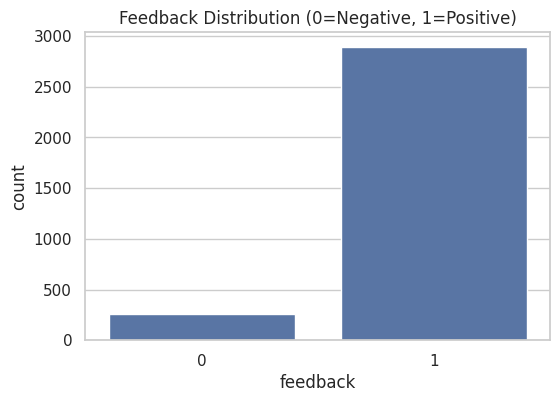

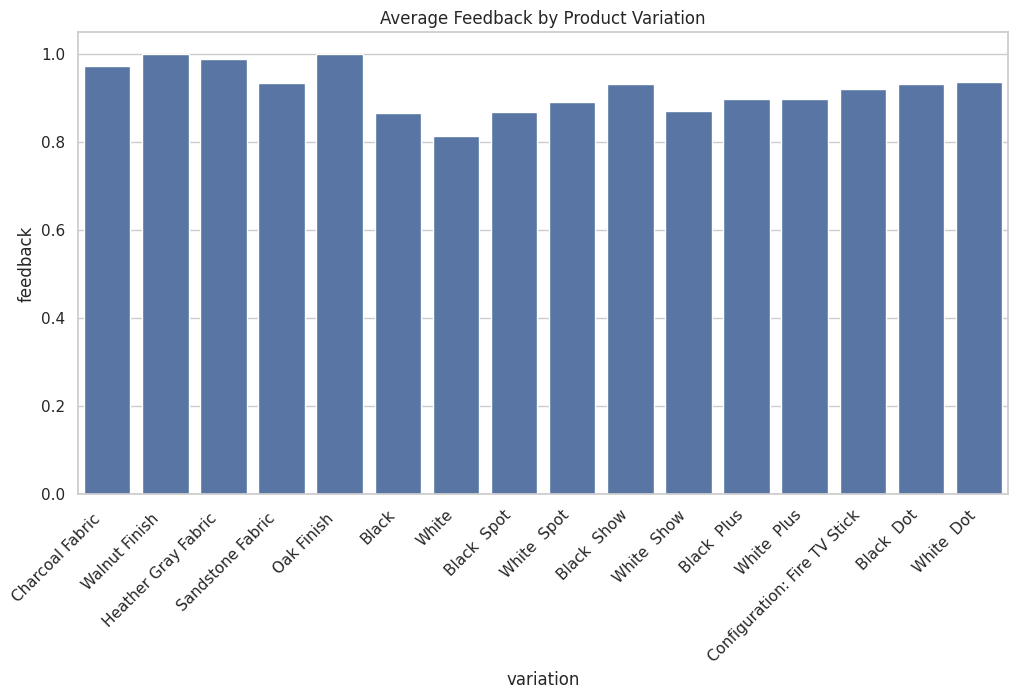

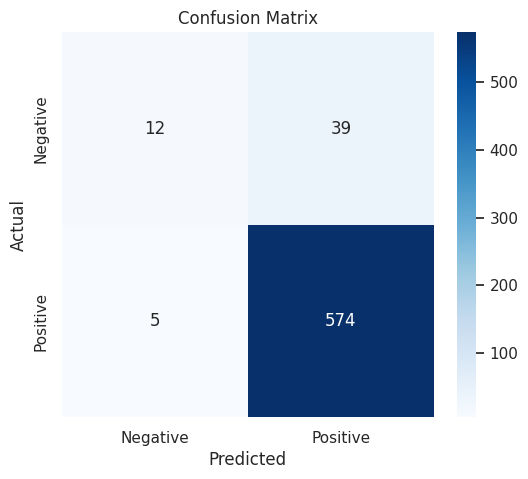

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.24      0.35        51
           1       0.94      0.99      0.96       579

    accuracy                           0.93       630
   macro avg       0.82      0.61      0.66       630
weighted avg       0.92      0.93      0.91       630

Training Accuracy: 0.9952
Testing Accuracy: 0.9302
The model may be overfitting: performs better on training data than testing data.


In [42]:
# Task 1: Import Libraries and Dataset

# Hint: You need to import libraries like pandas, numpy, matplotlib, seaborn, etc.
# Don't forget to mount Google Drive and load the CSV file using pandas.
# Use `pd.read_csv()` to load the data into a pandas DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# TODO: Import necessary libraries
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

# Check first few rows
df.head()

# TODO: Mount Google Drive

# TODO: Load the dataset into a DataFrame and preview the first few rows.


# Hint: Use `sns.countplot()` to visualize the feedback distribution and a bar plot to compare variations and feedback.
# Drop the columns 'date' and 'rating' as they are not relevant for the analysis.

# TODO: Visualize the distribution of feedback (positive/negative)
plt.figure(figsize=(6,4))
sns.countplot(x='feedback', data=df)
plt.title('Feedback Distribution (0=Negative, 1=Positive)')
plt.show()
# TODO: Visualize the relationship between product variation and feedback
plt.figure(figsize=(12,6))
sns.barplot(x='variation', y='feedback', data=df, ci=None)
plt.xticks(rotation=45, ha='right')
plt.title('Average Feedback by Product Variation')
plt.show()

# TODO: Drop irrelevant columns ('date', 'rating')
df = df.drop(['date', 'rating'], axis=1)



# Hint: Use `pd.get_dummies()` to create one-hot encoded columns for 'variation'.
# Then, concatenate these encoded columns back to the original DataFrame and drop the 'variation' column.

# TODO: Perform one-hot encoding on the 'variation' column
variation_dummies = pd.get_dummies(df['variation'], prefix='variation')
df = pd.concat([df.drop('variation', axis=1), variation_dummies], axis=1)





# Hint: Use `CountVectorizer` to tokenize the text data and convert it into numerical representation.
# After transforming the text, drop the 'verified_reviews' column and concatenate the numerical data with the rest of the DataFrame.

# TODO: Tokenize the 'verified_reviews' column using CountVectorizer
df['verified_reviews'] = df['verified_reviews'].fillna('')

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_reviews = vectorizer.fit_transform(df['verified_reviews'])


# Hint: Use `train_test_split()` to split the data into training and testing sets.
# You need to specify `test_size=0.2` to reserve 20% of the data for testing.

# TODO: Split the data into training and testing sets

# X_reviews_df = pd.DataFrame(X_reviews.toarray(), columns=vectorizer.get_feature_names_out())

# df = df.drop('verified_reviews', axis=1)
# df_model = pd.concat([df.reset_index(drop=True), X_reviews_df.reset_index(drop=True)], axis=1)
# X = df_model.drop('feedback', axis=1)
# y = df_model['feedback']
# df_model = df_model.loc[:, ~df_model.columns.duplicated()]
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )


# Hint: Initialize a `RandomForestClassifier` with 100 estimators.
# Use the `fit()` method to train the model on the training data.

# TODO: Define and train a Random Forest Classifier
f_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)





# Hint: Use the `predict()` method to generate predictions for the test data.
# Use `confusion_matrix()` to create the confusion matrix and visualize it using a heatmap.
# Print out a `classification_report()` to evaluate the model's precision, recall, and F1 score.

# TODO: Generate predictions and evaluate the model's performance using a confusion matrix and classification report

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))


# Task 8: Analyze Model Performance
# Hint: Use the `score()` method to calculate accuracy for both training and test sets.
# Compare the results and discuss if the model is overfitting or underfitting.

# TODO: Compare training and testing accuracy and discuss model performance
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy:
    print("The model may be overfitting: performs better on training data than testing data.")
elif train_accuracy < test_accuracy:
    print("The model may be underfitting: performs worse on training data than testing data.")
else:
    print("The model performs similarly on training and testing data.")



In [37]:
print(type(y))
print(y.shape)
print(y.columns if hasattr(y, 'columns') else 'No columns attribute')


<class 'pandas.core.frame.DataFrame'>
(3150, 2)
Index(['feedback', 'feedback'], dtype='object')


In [38]:
# Remove duplicate columns from df_model
df_model = df_model.loc[:, ~df_model.columns.duplicated()]

# Now assign y as Series
y = df_model['feedback']

print(type(y))  # Should print: <class 'pandas.core.series.Series'>
print(y.shape)
print(y.value_counts())


<class 'pandas.core.series.Series'>
(3150,)
feedback
1    2893
0     257
Name: count, dtype: int64


In [39]:
# Remove duplicate columns from df_model
df_model = df_model.loc[:, ~df_model.columns.duplicated()]

# Now assign y as Series
y = df_model['feedback']

print(type(y))  # Should print: <class 'pandas.core.series.Series'>
print(y.shape)
print(y.value_counts())


<class 'pandas.core.series.Series'>
(3150,)
feedback
1    2893
0     257
Name: count, dtype: int64


In [41]:
# Step 1: Remove duplicate columns from df_model
df_model = df_model.loc[:, ~df_model.columns.duplicated()]

# Step 2: Extract X and y properly
y = df_model['feedback']
X = df_model.drop('feedback', axis=1)

# Step 3: Check class distribution
print("Class distribution before filtering:")
print(y.value_counts())

# Step 4: Filter out rare classes with less than 2 samples
counts = y.value_counts()
rare_classes = counts[counts < 2].index.tolist()
mask = ~y.isin(rare_classes)

X_filtered = X[mask]
y_filtered = y[mask]

print("\nClass distribution after filtering:")
print(y_filtered.value_counts())

# Step 5: Now split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

print("\nTrain and test sets created successfully!")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Class distribution before filtering:
feedback
1    2893
0     257
Name: count, dtype: int64

Class distribution after filtering:
feedback
1    2893
0     257
Name: count, dtype: int64

Train and test sets created successfully!
Training set shape: (2520, 3799), (2520,)
Testing set shape: (630, 3799), (630,)
